# TF-IDF Vectorizer

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import numpy as np
import pandas as pd

toy_corpus= ["the fat cat sat on the mat",
             "the big cat slept",
             "the dog chased a cat"]
vectorizer=TfidfVectorizer(use_idf=True)

corpus_tfidf=vectorizer.fit_transform(toy_corpus)

print(f"The vocabulary size is {len(vectorizer.vocabulary_.keys())} ")
print(f"The document-term matrix shape is {corpus_tfidf.shape}")

df=pd.DataFrame(np.round(corpus_tfidf.toarray(),2))
df.columns=vectorizer.get_feature_names()
df

The vocabulary size is 10 
The document-term matrix shape is (3, 10)


,big,cat,chased,dog,fat,mat,on,sat,slept,the
0,0.00,0.25,0.00,0.00,0.42,0.42,0.42,0.42,0.00,0.49
1,0.61,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.61,0.36
2,0.00,0.36,0.61,0.61,0.00,0.00,0.00,0.00,0.00,0.36


## Classification

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
labels= [0,1,0]
clf =  SVC()
clf.fit(df, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [3]:
clf.predict(df)

array([0, 1, 0])

# Building a LM Model 
Once we prepared our corpus above, we are ready to start training Maximum Likelihood Estimator (MLE) as a Language Model.

## Training a bigram LM

In [4]:
!pip install nltk==3.5.0

     |████████████████████████████████| 1.4MB 18.6MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp37-none-any.whl size=1434676 sha256=b026191697fc0f1fd3d3503c277bd8b8b393a3d83015818aa19b9b5545d68fcb
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [5]:
import nltk
from nltk.corpus import gutenberg
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

nltk.download('gutenberg')
nltk.download('punkt')
macbeth = gutenberg.sents('shakespeare-macbeth.txt')

model, vocab = padded_everygram_pipeline(2, macbeth)
lm=MLE(2)
lm.fit(model,vocab)
print(list(lm.vocab)[:40])
print(f"The number of words is {len(lm.vocab)}")


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['<s>', '[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']', '</s>', 'Actus', 'Primus', '.', 'Scoena', 'Prima', 'Thunder', 'and', 'Lightning', 'Enter', 'three', 'Witches', '1', 'When', 'shall', 'we', 'meet', 'againe', '?', 'In', ',', 'or', 'in', 'Raine', '2', 'the', 'Hurley', '-', 'burley']
The number of words is 4020


In [6]:
print(macbeth[42])

['So', 'well', 'thy', 'words', 'become', 'thee', ',', 'as', 'thy', 'wounds', ',', 'They', 'smack', 'of', 'Honor', 'both', ':', 'Goe', 'get', 'him', 'Surgeons', '.']


## See what LM learned

Here is a list of what the language model learded so far

In [7]:
print(f"The frequency of the term 'Macbeth' is {lm.counts['Macbeth']}")
print(f"The language model probability score of 'Macbeth' is {lm.score('Macbeth')}")
print(f"The number of times 'Macbeth' follows 'Enter' is {lm.counts[['Enter']]['Macbeth']} ")
print(f"P(Macbeth | Enter) is {lm.score('Macbeth', ['Enter'])}")
print(f"P(shaking | for) is {lm.score('shaking', ['for'])}")

The frequency of the term 'Macbeth' is 61
The language model probability score of 'Macbeth' is 0.0022631149365585812
The number of times 'Macbeth' follows 'Enter' is 15 
P(Macbeth | Enter) is 0.1875
P(shaking | for) is 0.012195121951219513


## Language Generation with LM

To generate one word

In [8]:
lm.generate(1, random_seed=42)

'done'

To generate a sentence of 7 words length

In [9]:
print(lm.generate(7, random_seed=42))

['done', ',', 'Not', 'for', 'thee', 'in', 'this']


To generate 10 words starting with \<s>

In [10]:
 lm.generate(10, text_seed=['<s>'], random_seed=42)

['My', 'Bosome', 'franchis', "'", 's', 'of', 'time', ',', 'We', 'are']

# Word Embeddings Training

In [11]:
!pip install gensim==3.8.3

     |████████████████████████████████| 24.2MB 2.3MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [12]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=macbeth, size=100, window= 4, min_count=10, workers=4, iter=10)

In [13]:
model.wv.similar_by_word('then',10)

[('did', 0.9997876286506653),
 ('were', 0.9997825026512146),
 ('feare', 0.9997712969779968),
 ('To', 0.9997696876525879),
 ('can', 0.9997659921646118),
 ('be', 0.9997646808624268),
 ('me', 0.9997618198394775),
 ('(', 0.9997608661651611),
 ('for', 0.9997595548629761),
 ('So', 0.9997578859329224)]

In [14]:
model.wv['did'] # get numpy vector of word 'Macbeth'

array([-3.57733190e-01,  1.31498814e-01, -3.64811748e-01, -3.19560729e-02,
        2.22593561e-01,  1.39860272e-01,  2.89195538e-01,  1.13173693e-01,
       -2.03456119e-01,  2.30740398e-01,  3.21552157e-01, -1.94947589e-02,
        1.77455410e-01, -9.79656428e-02,  1.09568939e-01, -4.42196071e-01,
       -3.71391594e-01,  3.15961063e-01,  4.32639867e-01,  4.01205927e-01,
        4.15760688e-02,  2.13130236e-01, -1.46004602e-01,  3.42006655e-03,
        1.51956335e-01,  2.29435697e-01,  8.56862292e-02, -1.36864200e-01,
       -9.34164152e-02,  1.80605486e-01,  3.20621699e-01, -1.87747627e-01,
       -1.36048272e-01,  3.84179175e-01,  3.72940242e-01,  2.36134127e-01,
       -1.64353684e-01, -1.98470294e-01, -2.08301283e-03,  1.82027549e-01,
       -2.48176172e-01,  3.47447805e-02,  1.55179739e-01,  1.77648738e-02,
        3.28741083e-03,  4.83679831e-01,  6.38111308e-02,  2.69058108e-01,
       -2.61533726e-02,  2.02223346e-01, -6.04587682e-02, -4.09872234e-02,
       -1.39776707e-01,  

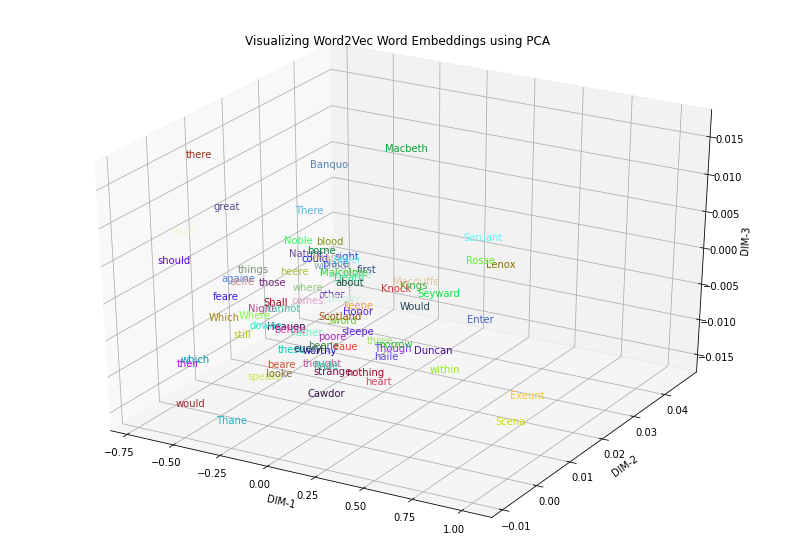

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
import numpy as np

np.random.seed(42)
words=list([e for e in model.wv.vocab if len(e)>4]) # plot words longer than 4
random.shuffle(words)
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words[:100]])

def plotWords3D(vecs, words, title):
    """
        Parameters
        ----------
        vecs : numpy-array
            Transformed 3D array either by PCA or other techniques
        words: a list of word
            the word list to be mapped
        title: str
            The title of plot     
        """
    fig = plt.figure(figsize=(14,10))
    ax = fig.gca(projection='3d')
    for w, vec in zip(words, vecs):
        ax.text(vec[0],vec[1],vec[2], w, color=np.random.rand(3,))
    ax.set_xlim(min(vecs[:,0]), max(vecs[:,0]))
    ax.set_ylim(min(vecs[:,1]), max(vecs[:,1]))
    ax.set_zlim(min(vecs[:,2]), max(vecs[:,2]))
    ax.set_xlabel('DIM-1')
    ax.set_ylabel('DIM-2')
    ax.set_zlabel('DIM-3')
    plt.title(title)
    plt.show()
plotWords3D(words3d, words, "Visualizing Word2Vec Word Embeddings using PCA")

## FastText

In [17]:
!pip install fasttext

     |████████████████████████████████| 71kB 5.3MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3095208 sha256=0b34603ab1f6efb2cbf26315aec8f1e7058494bc91cb4ecac1a8337e19dc6506
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [18]:
#Parameters min_n and max_n take control the lengths of character ngrams. 
#If max_n is set to 0, no character ngrams are used, and the model turns out to be Word2Vec.


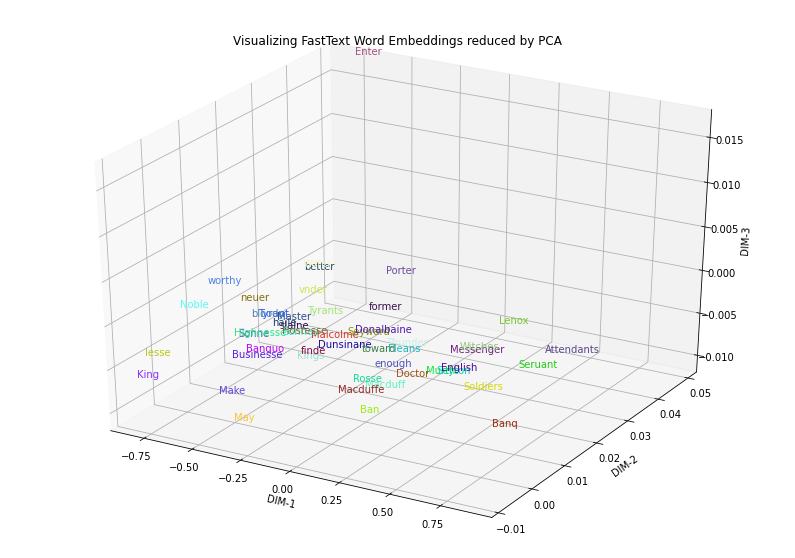

In [20]:
from gensim.models import FastText
model = FastText(sentences=macbeth, size=100, window=5, min_count=5,  workers=4, iter=10,word_ngrams=3)
#min_n: min length of char ngrams (Default 3)
#max_n: max length of char ngrams (Default 6)

np.random.seed(42)
words=[w[0] for w in model.wv.similar_by_word("Macbeth",50)]
words3d = PCA(n_components=3, random_state=42).fit_transform(model.wv[words])
plotWords3D(words3d, words, "Visualizing FastText Word Embeddings reduced by PCA")

In [21]:
## Glove

In [22]:
import gensim.downloader as api
info = api.info()  # show info about available models/datasets
model = api.load("glove-twitter-25")  # download the model and return as object ready for use

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
model.most_similar("java")

[('drupal', 0.8857486248016357),
 ('linux', 0.8667981028556824),
 ('electronic', 0.8582332134246826),
 ('adobe', 0.8580152988433838),
 ('developer', 0.8561978936195374),
 ('server', 0.8490769863128662),
 ('javascript', 0.8466134667396545),
 ('osx', 0.839451014995575),
 ('enterprise', 0.8377522826194763),
 ('software', 0.8366125226020813)]

# LSTM Training

In [3]:
import numpy as np
import tensorflow as tf

In [4]:
!wget https://dl.fbaipublicfiles.com/glue/data/SST-2.zip 
!unzip SST-2.zip

--2021-04-20 17:26:28--  https://dl.fbaipublicfiles.com/glue/data/SST-2.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7439277 (7.1M) [application/zip]
Saving to: ‘SST-2.zip’

SST-2.zip           100%[===================>]   7.09M  4.07MB/s    in 1.7s    

2021-04-20 17:26:31 (4.07 MB/s) - ‘SST-2.zip’ saved [7439277/7439277]

Archive:  SST-2.zip
   creating: SST-2/
  inflating: SST-2/dev.tsv           
   creating: SST-2/original/
  inflating: SST-2/original/README.txt  
  inflating: SST-2/original/SOStr.txt  
  inflating: SST-2/original/STree.txt  
  inflating: SST-2/original/datasetSentences.txt  
  inflating: SST-2/original/datasetSplit.txt  
  inflating: SST-2/original/dictionary.txt  
  inflating: SST-2/original/original_rt_snippets.txt  
  inflating: SST-2/original/sent

In [5]:
import pandas as pd 
df=pd.read_csv('SST-2/train.tsv',sep="\t")
sentences=df.sentence
labels=df.label

In [6]:
df.head(3)

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1


In [7]:
max_sen_len=max([len(s.split()) for s in sentences])
words = ["PAD"]+list(set([w for s in sentences for w in s.split()]))
word2idx= {w:i for i,w in enumerate(words)}
max_words=max(word2idx.values())+1
idx2word= {i:w for i,w in enumerate(words)}
# preparing training set
train=[list(map(lambda x:word2idx[x], s.split())) for s in sentences]

In [8]:
len(train), len(labels)

(67349, 67349)

In [9]:
sum(labels), len(labels), sum(labels)/ len(labels)

(37569, 67349, 0.5578256544269403)

In [10]:
from keras import preprocessing
train_pad = preprocessing.sequence.pad_sequences(train, maxlen=max_sen_len)
print('train shape:', train_pad.shape)

train shape: (67349, 52)


In [11]:
print(train_pad)

[[    0     0     0 ...  8813 11280  9657]
 [    0     0     0 ... 10692 13130  6086]
 [    0     0     0 ...  6422  1041   579]
 ...
 [    0     0     0 ...  9886  8818  5333]
 [    0     0     0 ...  9377 13947  6890]
 [    0     0     0 ...  8813  7437 13462]]


In [12]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_pad,labels, epochs=15, batch_size=16, validation_split=0.2)

Epoch 1/15
3368/3368 [==============================] - 38s 6ms/step - loss: 0.5326 - acc: 0.7152 - val_loss: 0.3408 - val_acc: 0.8506
Epoch 2/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.3018 - acc: 0.8735 - val_loss: 0.3198 - val_acc: 0.8684
Epoch 3/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.2645 - acc: 0.8919 - val_loss: 0.2772 - val_acc: 0.8853
Epoch 4/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.2324 - acc: 0.9086 - val_loss: 0.2736 - val_acc: 0.8907
Epoch 5/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.2117 - acc: 0.9174 - val_loss: 0.2528 - val_acc: 0.9014
Epoch 6/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.1920 - acc: 0.9245 - val_loss: 0.2445 - val_acc: 0.9071
Epoch 7/15
3368/3368 [==============================] - 21s 6ms/step - loss: 0.1756 - acc: 0.9331 - val_loss: 0.2335 - val_acc: 0.9117
Epoch 8/15
3368/3368 [==============================] -

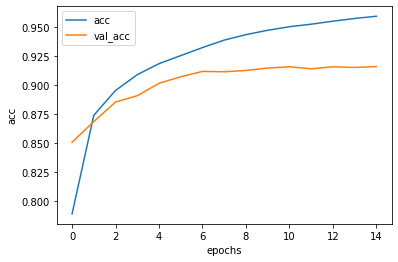

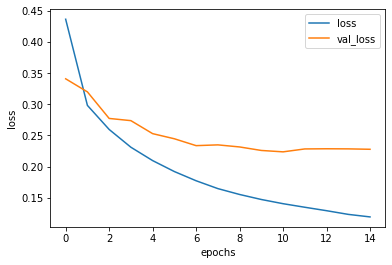

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [14]:
from keras import layers
model = Sequential()
model.add(layers.Embedding(max_words, 32, input_length=max_sen_len))
model.add(layers.Conv1D(32, 8, activation='relu'))
model.add(layers.MaxPooling1D(4))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_pad,labels, epochs=15, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 52, 32)            474144    
_________________________________________________________________
conv1d (Conv1D)              (None, 45, 32)            8224      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 32)             3104      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 485,505
Trainable params: 485,505
Non-trainable params: 0
________________________________________________

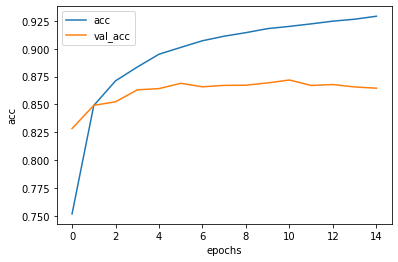

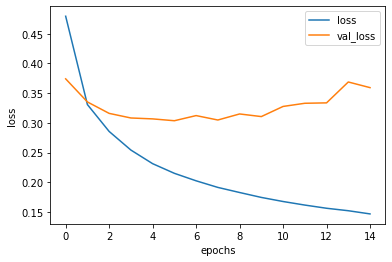

In [15]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

keras-vis                     0.4.1         
